In [16]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy
import ast


In [22]:
data = pd.read_csv('../data/processed/requirements_data_processed_cleaned.csv')

data['requirements'] = data['requirements'].apply(ast.literal_eval)
cleaned = data['requirements'].apply(lambda x: list(set(x)))
exploded = cleaned.explode()
skill_count = exploded.value_counts()
skill_precent = ((skill_count / len(data)) * 100)

df_skills = pd.DataFrame({
    'skill': skill_count.index,
    'count': skill_count.values,
    'precent': skill_precent.values
})

df_skills.to_csv('../data/processed/skill_processed_data.csv', index=False)

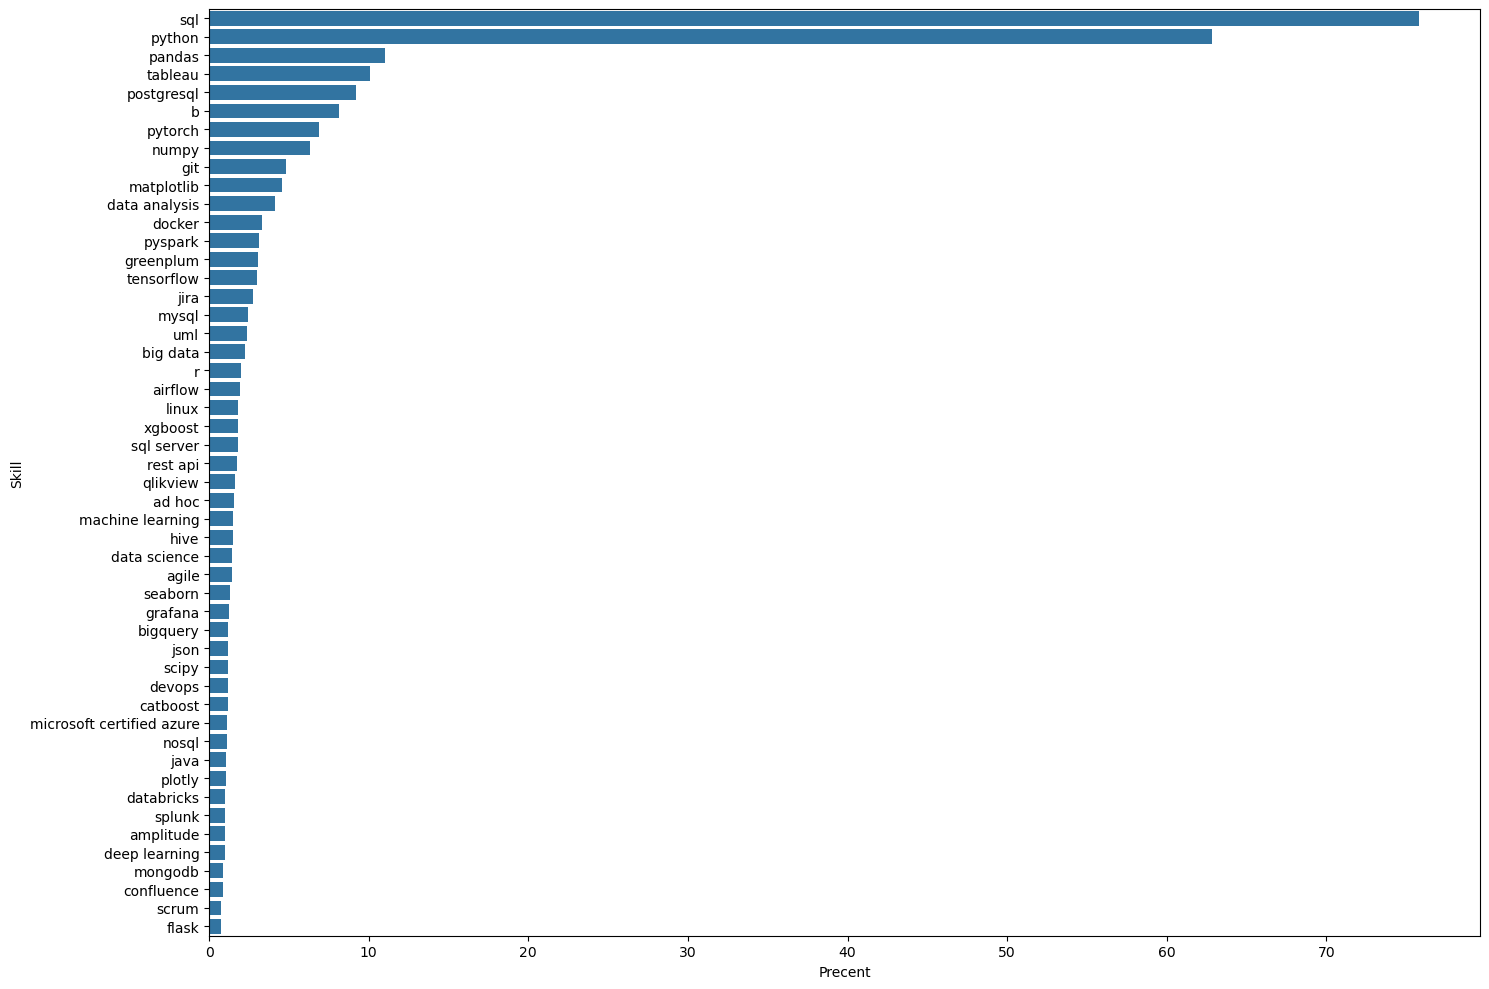

In [23]:
df_top = df_skills.head(50)
plt.figure(figsize=(15, 10))
seaborn.barplot(data=df_top, 
            x='precent', 
            y='skill', 
            errorbar=None)  
plt.xlabel('Precent')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()